In [1]:
# Import the dependencies.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [2]:
from citipy import citipy

In [3]:
# Import the API key.
from config import weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Range of latitudes and longitudes
latitude_range = (-90, 90)
longitude_range = (-180, 180)

In [6]:
# List for holding latitude, longitude and cities
latitude_longitude = []
cities = []

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [13]:
# Starting URL for Weather Map API Call, no city defined
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | tarko-sale
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | horlesti
Processing Record 5 of Set 1 | libreville
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | port hardy
Processing Record 8 of Set 1 | katsuura
Processing Record 9 of Set 1 | naze
Processing Record 10 of Set 1 | ninh binh
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | bambanglipuro
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | tynda
Processing Record 18 of Set 1 | dabakala
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | lianran
Processing Record 21 of Set 1 | amderma
City not found. Skipping...
Processing Record 22 of Set 1 | hilo
Processing Recor

Processing Record 32 of Set 4 | sovetskiy
Processing Record 33 of Set 4 | solnechnyy
Processing Record 34 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 35 of Set 4 | saint-georges
Processing Record 36 of Set 4 | palauig
Processing Record 37 of Set 4 | faya
Processing Record 38 of Set 4 | provideniya
Processing Record 39 of Set 4 | labuhan
Processing Record 40 of Set 4 | bodden town
Processing Record 41 of Set 4 | nouna
Processing Record 42 of Set 4 | oriximina
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | cariamanga
Processing Record 45 of Set 4 | namatanai
Processing Record 46 of Set 4 | kaya
Processing Record 47 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | isla mujeres
Processing Record 50 of Set 4 | gat
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | saskylakh
Processing Record 3 of Set 5 | arrecife
Processing Record 4 of Set 5 | rangoon
Pro

Processing Record 29 of Set 8 | kailua
Processing Record 30 of Set 8 | norcasia
Processing Record 31 of Set 8 | nouadhibou
Processing Record 32 of Set 8 | comodoro rivadavia
Processing Record 33 of Set 8 | okha
Processing Record 34 of Set 8 | shar
Processing Record 35 of Set 8 | jining
Processing Record 36 of Set 8 | evinayong
Processing Record 37 of Set 8 | meyungs
City not found. Skipping...
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | khorinsk
Processing Record 40 of Set 8 | dawei
Processing Record 41 of Set 8 | san policarpo
Processing Record 42 of Set 8 | tura
Processing Record 43 of Set 8 | abonnema
Processing Record 44 of Set 8 | dingle
Processing Record 45 of Set 8 | sorland
Processing Record 46 of Set 8 | nome
Processing Record 47 of Set 8 | marzuq
Processing Record 48 of Set 8 | san quintin
Processing Record 49 of Set 8 | yei
Processing Record 50 of Set 8 | te anau
Processing Record 1 of Set 9 | vao
Processing Record 2 of Set 9 | kamaishi
Processin

Processing Record 16 of Set 12 | campo grande
Processing Record 17 of Set 12 | lazaro cardenas
Processing Record 18 of Set 12 | victoria
Processing Record 19 of Set 12 | aflu
City not found. Skipping...
Processing Record 20 of Set 12 | washougal
Processing Record 21 of Set 12 | banmo
City not found. Skipping...
Processing Record 22 of Set 12 | lebanon
Processing Record 23 of Set 12 | lahaina
Processing Record 24 of Set 12 | filadelfia
Processing Record 25 of Set 12 | preobrazheniye
Processing Record 26 of Set 12 | chunskiy
Processing Record 27 of Set 12 | kachikau
City not found. Skipping...
Processing Record 28 of Set 12 | lander
Processing Record 29 of Set 12 | fort frances
Processing Record 30 of Set 12 | ksenyevka
City not found. Skipping...
Processing Record 31 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 32 of Set 12 | benghazi
Processing Record 33 of Set 12 | meadow lake
Processing Record 34 of Set 12 | asau
Processing Record 35 of Set 12 | rawannawi
Ci

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,31.69,74,100,12.44,RU,2022-09-17 19:13:32
1,Tarko-Sale,64.9225,77.7850,49.46,68,100,12.97,RU,2022-09-17 19:13:32
2,Port Alfred,-33.5906,26.8910,61.18,97,100,1.99,ZA,2022-09-17 19:13:32
3,Horlesti,47.1167,27.3667,59.11,93,100,5.46,RO,2022-09-17 19:13:33
4,Libreville,0.3925,9.4537,77.50,81,100,10.51,GA,2022-09-17 19:09:37
5,Torbay,47.6666,-52.7314,60.58,76,75,21.85,CA,2022-09-17 19:13:33
6,Port Hardy,50.6996,-127.4199,53.78,87,75,4.61,CA,2022-09-17 19:13:33
7,Katsuura,35.1333,140.3000,78.75,88,100,13.27,JP,2022-09-17 19:13:34
8,Naze,28.3667,129.4833,78.17,91,100,41.54,JP,2022-09-17 19:13:34
9,Ninh Binh,20.2539,105.9750,78.19,91,17,2.51,VN,2022-09-17 19:11:26


In [78]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed

new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-09-17 19:13:32,68.7500,161.3000,31.69,74,100,12.44
1,Tarko-Sale,RU,2022-09-17 19:13:32,64.9225,77.7850,49.46,68,100,12.97
2,Port Alfred,ZA,2022-09-17 19:13:32,-33.5906,26.8910,61.18,97,100,1.99
3,Horlesti,RO,2022-09-17 19:13:33,47.1167,27.3667,59.11,93,100,5.46
4,Libreville,GA,2022-09-17 19:09:37,0.3925,9.4537,77.50,81,100,10.51
5,Torbay,CA,2022-09-17 19:13:33,47.6666,-52.7314,60.58,76,75,21.85
6,Port Hardy,CA,2022-09-17 19:13:33,50.6996,-127.4199,53.78,87,75,4.61
7,Katsuura,JP,2022-09-17 19:13:34,35.1333,140.3000,78.75,88,100,13.27
8,Naze,JP,2022-09-17 19:13:34,28.3667,129.4833,78.17,91,100,41.54
9,Ninh Binh,VN,2022-09-17 19:11:26,20.2539,105.9750,78.19,91,17,2.51


In [82]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [83]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

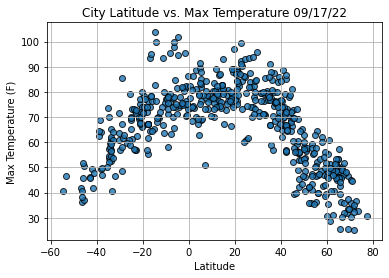

In [84]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

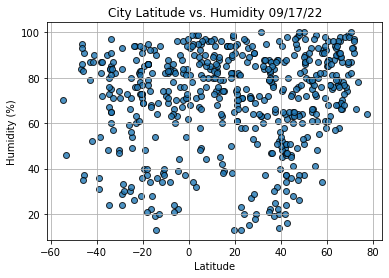

In [85]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

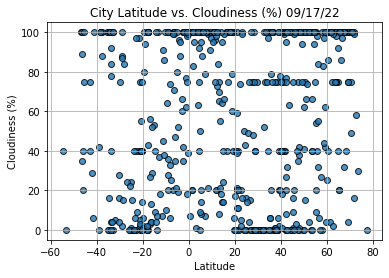

In [86]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

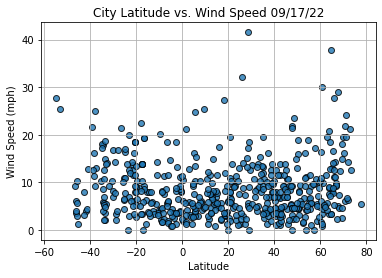

In [91]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [92]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [93]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2022-09-17 19:13:36
Lat                         -54.8
Lng                         -68.3
Max Temp                    40.66
Humidity                       70
Cloudiness                     40
Wind Speed                  27.63
Name: 13, dtype: object

In [97]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
539    False
540    False
541    False
542    False
543    False
Name: Lat, Length: 544, dtype: bool

In [98]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-09-17 19:13:32,68.7500,161.3000,31.69,74,100,12.44
1,Tarko-Sale,RU,2022-09-17 19:13:32,64.9225,77.7850,49.46,68,100,12.97
3,Horlesti,RO,2022-09-17 19:13:33,47.1167,27.3667,59.11,93,100,5.46
4,Libreville,GA,2022-09-17 19:09:37,0.3925,9.4537,77.50,81,100,10.51
5,Torbay,CA,2022-09-17 19:13:33,47.6666,-52.7314,60.58,76,75,21.85
...,...,...,...,...,...,...,...,...,...
530,Benghazi,LY,2022-09-17 19:27:40,32.1167,20.0667,79.81,60,0,4.83
531,Meadow Lake,US,2022-09-17 19:27:41,34.8014,-106.5436,85.84,21,0,13.38
532,Asau,RO,2022-09-17 19:27:41,46.4333,26.4000,56.32,97,100,2.10
535,Asfi,MA,2022-09-17 19:27:42,32.2994,-9.2372,71.24,85,0,13.24


In [99]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2022-09-17 19:13:32,68.7500,161.3000,31.69,74,100,12.44
1,Tarko-Sale,RU,2022-09-17 19:13:32,64.9225,77.7850,49.46,68,100,12.97
3,Horlesti,RO,2022-09-17 19:13:33,47.1167,27.3667,59.11,93,100,5.46
4,Libreville,GA,2022-09-17 19:09:37,0.3925,9.4537,77.50,81,100,10.51
5,Torbay,CA,2022-09-17 19:13:33,47.6666,-52.7314,60.58,76,75,21.85


In [100]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

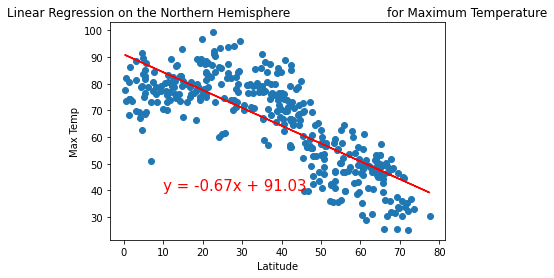

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

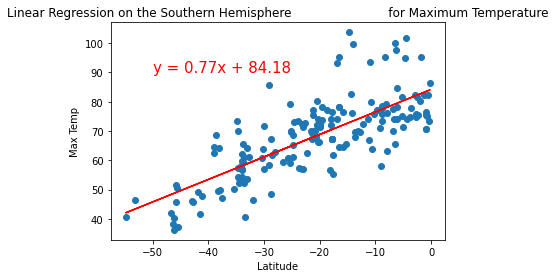

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [103]:
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 
# for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, 
# as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer
# And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

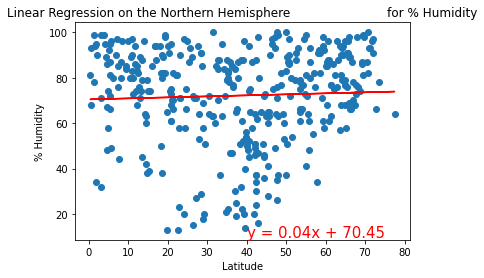

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

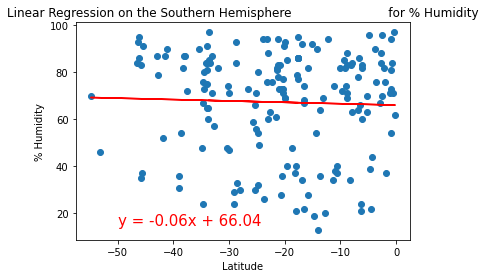

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [106]:
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 
# for the Northern and Southern Hemispheres for the plots shown here. This means that 
# percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
# Check the r-values for your plots. 

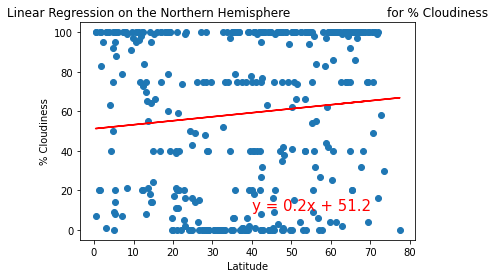

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

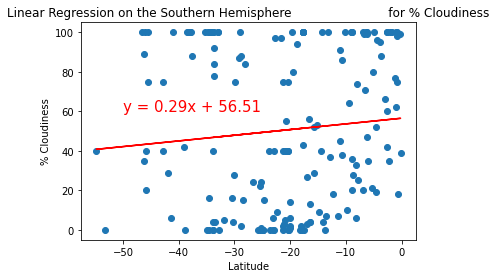

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [110]:
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09
# for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
# This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 
# Check the r-values for your plots. 

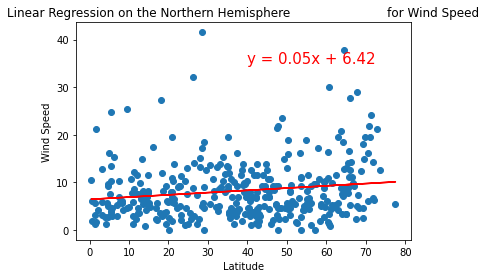

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

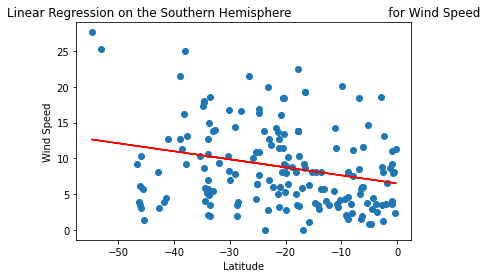

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [113]:
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 
# for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. 
# This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
# Check the r-values for your plots. 